In [7]:
import pandas as pd 
import sklearn
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score

from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids

In [8]:
cc_df=pd.read_csv("creditcard.csv")
print(cc_df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [9]:
# Split into Train / Test Sets
x=cc_df.drop(columns='Class',axis=1)
print(x)

y=cc_df[['Class']].copy()
print(y)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [10]:
# Oversampling (Smote) + Random Forest 
xsmote,ysmote=SMOTE(random_state=1,sampling_strategy=1.0).fit_resample(xtrain,ytrain)

print(xsmote)
print(ysmote)

                 Time         V1        V2         V3        V4        V5  \
0       159708.000000  -0.459482  1.198230   2.315423  4.274698  0.603004   
1       129139.000000   1.878563  0.020785  -1.621113  2.908813  2.507847   
2         4263.000000  -1.467414  1.210542   1.891733 -0.282189 -0.214526   
3       113041.000000   2.073474 -0.147624  -1.495803  0.184499  0.107505   
4        77352.000000   1.097497  0.357207   1.051187  2.631217 -0.464023   
...               ...        ...       ...        ...       ...       ...   
426443   41233.586829 -10.355998  6.092424 -13.081348  7.333507 -9.550066   
426444   35886.873089  -2.813944  3.771450  -3.775914  5.561832 -3.589699   
426445  143237.936649  -1.408302  2.508873  -2.686728  4.111950  0.516272   
426446  129738.321857  -1.581447  2.974258  -6.213306  3.656808 -0.810412   
426447  150719.013410  -0.261952  1.361121  -2.416682  3.613812  0.951105   

              V6         V7        V8        V9  ...       V20       V21  \

In [11]:
import xgboost as xgb

xgb=xgb.XGBClassifier(
    learning_rate=0.05,
    max_depth=2,
    n_estimators=100,
    scale_pos_weight=5)

In [12]:
xgb.fit(xsmote,ysmote)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[16:19:04] WARNING: /private/var/folders/tn/scrc7fy54771ngyq24hw419m0000gn/T/pip-install-fp4t23h0/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
xgb_pred=xgb.predict(xtest)
print(classification_report_imbalanced(ytest,xgb_pred))
print("ACCURACY: "+str(accuracy_score(ytest,xgb_pred)))
print("AREA UNDER CURVE: "+str(roc_auc_score(ytest,xgb_pred)))
print("F1-SCORE: "+str(f1_score(ytest,xgb_pred)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.96      0.88      0.98      0.92      0.86     71091
          1       0.04      0.88      0.96      0.07      0.92      0.84       111

avg / total       1.00      0.96      0.88      0.98      0.92      0.86     71202

ACCURACY: 0.9634701272436168
AREA UNDER CURVE: 0.9232394186818798
F1-SCORE: 0.07007508044333215


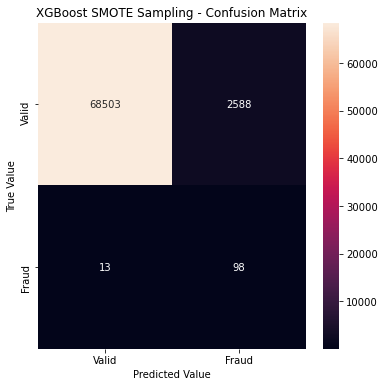

In [14]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,xgb_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("XGBoost SMOTE Sampling - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [15]:
# Combination Sampling + XGBoost
smote_enn=SMOTEENN(random_state=0)
xsmtn,ysmtn=smote_enn.fit_resample(xtrain,ytrain)

In [16]:
xgb.fit(xsmtn,ysmtn.values.ravel())

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:19:56] WARNING: /private/var/folders/tn/scrc7fy54771ngyq24hw419m0000gn/T/pip-install-fp4t23h0/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
xgb_pred=xgb.predict(xtest)
print(classification_report_imbalanced(ytest,xgb_pred))
print("ACCURACY: "+str(accuracy_score(ytest,xgb_pred)))
print("AREA UNDER CURVE: "+str(roc_auc_score(ytest,xgb_pred)))
print("F1-SCORE: "+str(f1_score(ytest,xgb_pred)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.97      0.88      0.98      0.92      0.86     71091
          1       0.04      0.88      0.97      0.07      0.92      0.85       111

avg / total       1.00      0.97      0.88      0.98      0.92      0.86     71202

ACCURACY: 0.965829611527766
AREA UNDER CURVE: 0.9244210028486518
F1-SCORE: 0.07455306200076073


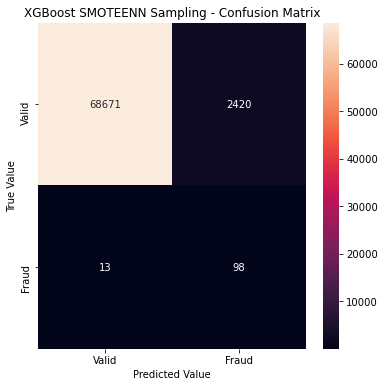

In [18]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,xgb_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("XGBoost SMOTEENN Sampling - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [19]:
# Undersampling
cc=ClusterCentroids(random_state=1)
xcc,ycc=cc.fit_resample(xtrain,ytrain)

In [20]:
xgb.fit(xcc,ycc.values.ravel())

[16:22:36] WARNING: /private/var/folders/tn/scrc7fy54771ngyq24hw419m0000gn/T/pip-install-fp4t23h0/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
xgb_pred=xgb.predict(xtest)
print(classification_report_imbalanced(ytest,xgb_pred))
print("ACCURACY: "+str(accuracy_score(ytest,xgb_pred)))
print("AREA UNDER CURVE: "+str(roc_auc_score(ytest,xgb_pred)))
print("F1-SCORE: "+str(f1_score(ytest,xgb_pred)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.23      0.98      0.38      0.48      0.21     71091
          1       0.00      0.98      0.23      0.00      0.48      0.24       111

avg / total       1.00      0.23      0.98      0.38      0.48      0.21     71202

ACCURACY: 0.2325496474818123
AREA UNDER CURVE: 0.6066807407483442
F1-SCORE: 0.003973606503590829


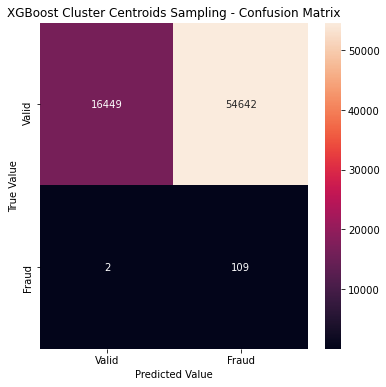

In [22]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,xgb_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("XGBoost Cluster Centroids Sampling - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [23]:
# No sampling
xgb.fit(xtrain,ytrain.values.ravel())
xgb_pred=xgb.predict(xtest)
print(classification_report_imbalanced(ytest,xgb_pred))
print("ACCURACY: "+str(accuracy_score(ytest,xgb_pred)))
print("AREA UNDER CURVE: "+str(roc_auc_score(ytest,xgb_pred)))
print("F1-SCORE: "+str(f1_score(ytest,xgb_pred)))

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:22:37] WARNING: /private/var/folders/tn/scrc7fy54771ngyq24hw419m0000gn/T/pip-install-fp4t23h0/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.77      1.00      0.88      0.79     71091
          1       0.75      0.77      1.00      0.76      0.88      0.76       111

avg / total       1.00      1.00      0.78      1.00      0.88      0.79     71202

ACCURACY: 0.9992556388865481
AREA UNDER CURVE: 0.8871904566929254
F1-SCORE: 0.7644444444444445


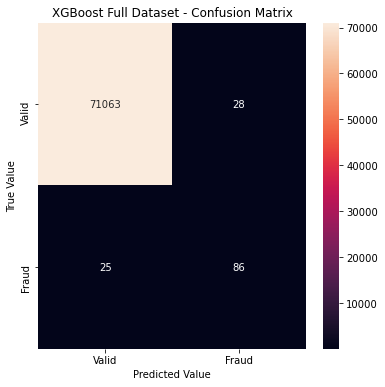

In [24]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,xgb_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("XGBoost Full Dataset - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()